In [259]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
import os
import json
import numpy as np
import pandas as pd
from explorer.utils import load_states_from_dir
import matplotlib.pyplot as plt

In [350]:
# log_dir = "/Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum/player_one_eval_p1_completely_rational_p2_somewhat_rational"
# log_dir = "/Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum/player_one_p2_irrational"
log_dir = "/Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum/player_two_eval_gp4"
game_states = load_states_from_dir(log_dir) #+ load_states_from_dir(log_dir) 

THERE ARE 105 log files
105 Loaded Successfully


In [351]:
def player_one_proposals(game_states):
    trades = [ g.game_state[1]['player_public_info_dict']['newly proposed trade']for g in game_states] 
    proposal_values = np.array([ t.resources_from_first_agent.value() for t in trades])
    return proposal_values

def player_two_acceptance(game_states):
    decision = [ g.game_state[2]['player_public_info_dict']['player answer']for g in game_states] 
    trades = [ g.game_state[1]['player_public_info_dict']['newly proposed trade']for g in game_states] 
    proposal_values = np.array([ t.resources_from_first_agent.value() for t in trades])
    return list(zip(proposal_values, decision))


In [352]:
proposal_and_decision = player_two_acceptance(game_states)
proposal_and_decision = [p for p,d in proposal_and_decision if d =='ACCEPTED']
# proposal_and_decision


In [353]:
# game_states[34].game_state[1]['player_private_info_dict']['reason']

Text(0, 0.5, 'Probability')

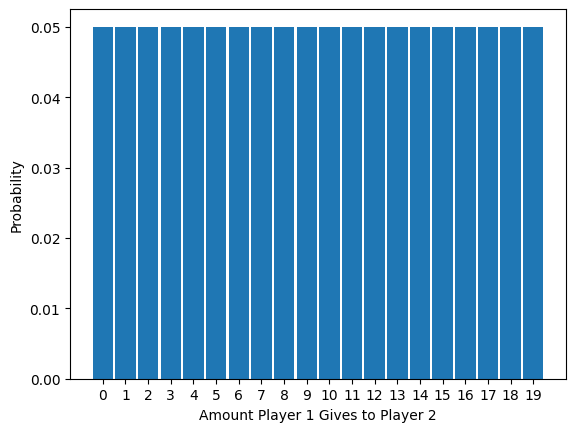

In [354]:
plt.hist(proposal_values,bins=np.arange(21) - 0.5,rwidth=0.9, density=True)
plt.xticks(list(range(0,20,1)))
plt.xlabel('Amount Player 1 Gives to Player 2')
plt.ylabel('Probability')


Text(0, 0.5, 'Probability P2 Accepts')

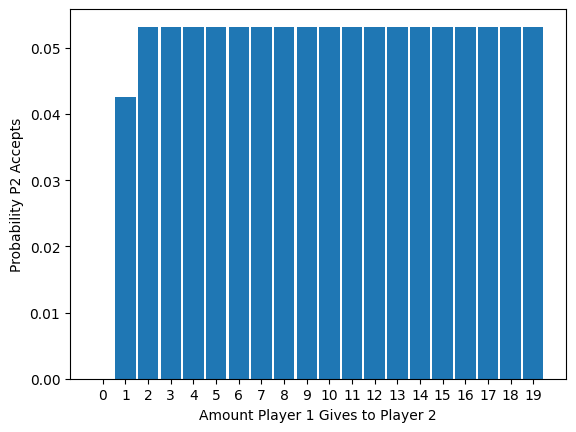

In [355]:
plt.hist(proposal_and_decision, bins=np.arange(21) - 0.5,rwidth=0.9, density=True)
plt.xticks(list(range(0,20,1)))
plt.xlabel('Amount Player 1 Gives to Player 2')
plt.ylabel('Probability P2 Accepts')


